# Week 1 class

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/goodman-imperial/discrete-maths-classes/blob/main/week-1-class.ipynb)

The aim of this class is to implement the Fibonacci algorithm using the following methods, and plot their timings (for $n=1$ to 100, except for the recursive algorithm where you should stop at $n=30$):

* Recursive
* Table
* Keep last two values
* Analytic (if you have time)
* Matrix (if you have time)

## Python

You can use any language you like, but I'll use Python for all my code samples and during the class. I think Python is very simple syntactically so the code samples should be easy enough to follow even if you don't know Python. On the other hand, I would strongly encourage you to learn it as it's an incredibly useful language. Here is a nice tutorial on Python, NumPy (numerical library for efficient array computation) and Jupyter (the notebook interface I'm using here):

* [Python Numpy Jupyter tutorial](https://cs231n.github.io/python-numpy-tutorial/)

Here is a little sample of plotting timings for a function in Python.

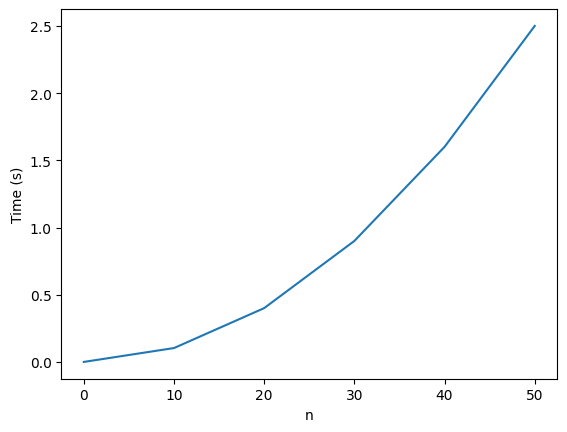

In [1]:
# this first line is just used to make the plots appear nicely in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def fake_function(n):
    time.sleep(0.001*n*n)
    
def timeit(n):
    start = time.time()
    fake_function(n)
    end = time.time()
    return end-start
    
N = [0, 10, 20, 30, 40, 50]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)');

## Implementation notes on compiled languages

For the other ones, if you're using a compiled language, they might run so fast that in order to time them you should slow down the addition by adding a 1 microsecond wait. I've included a C++ ``busy_sleep`` function below to do that.

```c++
#include <chrono>
#include <iostream>
#include <fstream>

using namespace std;

// this function busy sleeps for n microseconds
void busy_sleep(int n)
{
    auto start = chrono::steady_clock::now();
    while(chrono::duration_cast<chrono::microseconds>(chrono::steady_clock::now() - start).count()<n) {};
}
```

# Recursive

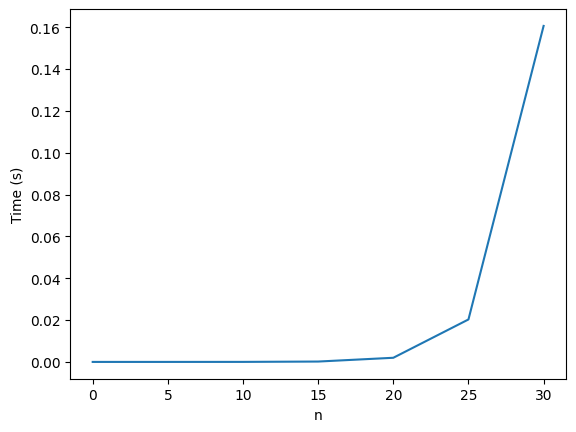

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time

def fibonacci_recursive(n):
    if (n <= 1): 
        return n
    else:
        return (fibonacci_recursive(n-1) + fibonacci_recursive(n-2))

def timeit(n):
    start = time.time()
    fibonacci_recursive(n)
    end = time.time()
    return (end-start)

N = [0, 5, 10, 15, 20, 25, 30]
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.show()

# Table

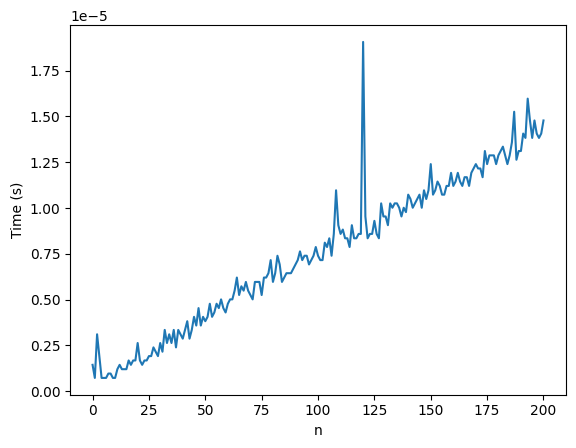

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

def fibonacci_table(n):
    if n <= 1:
        return n
    table = [0, 1]
    for i in range(2, n + 1):
        table.append(table[i-1] + table[i-2])
    return table[n]

def timeit(n):
    start = time.time()
    fibonacci_table(n)
    end = time.time()
    return (end-start)

N = range(0, 201)
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.show()

# Keep Last Two

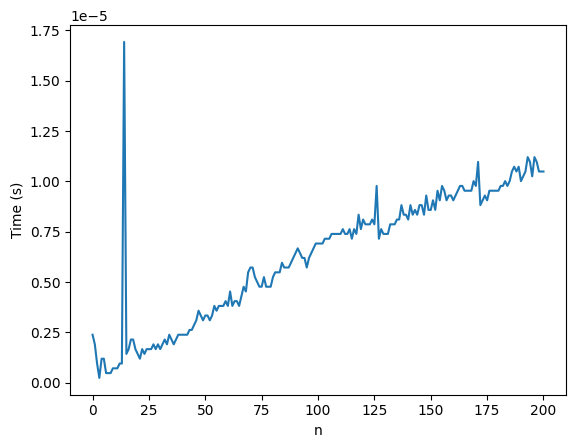

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time

def fibonacci(n):
    a = b = 1
    for i in range(3, n):
        temp = a
        a = b
        b = b + temp
    return b

def timeit(n):
    start = time.time()
    fibonacci(n)
    end = time.time()
    return (end-start)

N = range(0, 201)
T = [timeit(n) for n in N]
plt.plot(N, T)
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.show()